# Exploratory Data Analysis

## Set up

In [2]:
import pandas as pd
import altair as alt
alt.data_transformers.disable_max_rows()
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [4]:
file_path_1 = "/home/jupyter/CPSC 368/DB-Research-Project/data/cleaned/california.csv"
california = pd.read_csv(file_path_1)
california

,YEAR,STATE,RATE,DEATHS
0,2022,CA,25.0,"11,618"
1,2021,CA,25.5,"11,440"
2,2020,CA,25.4,"11,642"
3,2019,CA,21.8,"9,854"
4,2018,CA,21.4,"9,506"
5,2017,CA,22.1,"9,595"
6,2016,CA,21.4,"9,124"


In [5]:
file_path_2 = "/home/jupyter/CPSC 368/DB-Research-Project/data/cleaned/counties.csv"
counties = pd.read_csv(file_path_2)
counties.head()

,Year,County,PQI,PQIDescription,Count_ICD10,Population_ICD10,ObsRate_ICD10
0,2022,Alameda,1,Diabetes Short-term Complications,654,"1,311,253",49.9
1,2022,Alameda,3,Diabetes Long-term Complications,821,"1,311,253",62.6
2,2022,Alameda,14,Uncontrolled Diabetes,297,"1,311,253",22.7
3,2022,Alameda,93,Diabetes Composite,"1,945","1,311,253",148.3
4,2022,Alpine,1,Diabetes Short-term Complications,0,998,0.0


## EDA

### Visualization 1: Number of Death in California Due To Diabetes From 2016 To 2022

- This is the one and only visualization that we will create for our first dataset. It directly shows how the number of deaths due to diabetes changed from 2016 to 2022.
- Since one of our research questions is related to studying the time series with respect to the number of deaths/hospitalizations, a visualization like the one below can offer us some initial insights.

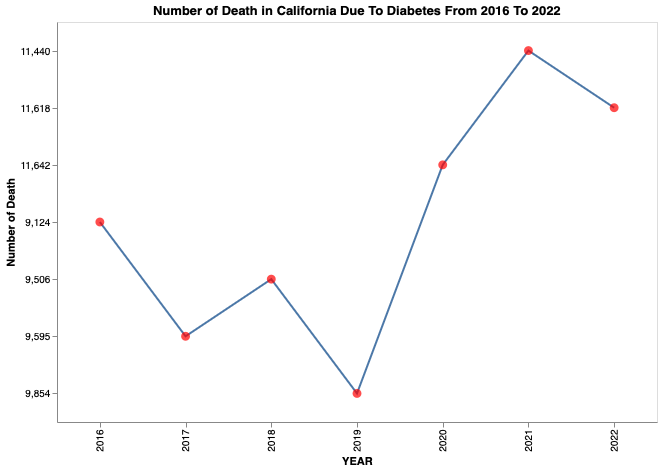

In [16]:
# If you are reviewing the following visualization through Jupyter Notebook, 
# when you hover the mouse over the highlighted points, 
# you should be able to see more detailed information regarding each year.

death_trend_in_cali = alt.Chart(california).mark_line().encode(
    alt.X('YEAR:N'),
    alt.Y('DEATHS', title = 'Number of Death')
).properties(
    title = 'Number of Death in California Due To Diabetes From 2016 To 2022',
    width = 600,
    height = 400
)

specific_points = alt.Chart(california).mark_point(
    size = 80, 
    filled= True,  
    color = 'red'  
).encode(
    alt.X('YEAR:N'),
    alt.Y('DEATHS'),
    alt.Tooltip(['YEAR', 'DEATHS', 'RATE'])
)

vis1 = death_trend_in_cali + points
vis1

### Visualization 2: 

In [21]:
vis_2 = alt.Chart(counties).mark_bar().encode(
    alt.X('Year:O'),
    alt.Y('sum(Count_ICD10):Q'),
    alt.Color('PQIDescription:N'),
    alt.Row('County')
)

In [25]:
ski_china = counties[counties['County'] == 'Alameda']
ski_china

,Year,County,PQI,PQIDescription,Count_ICD10,Population_ICD10,ObsRate_ICD10
0,2022,Alameda,1,Diabetes Short-term Complications,654,"1,311,253",49.9
1,2022,Alameda,3,Diabetes Long-term Complications,821,"1,311,253",62.6
2,2022,Alameda,14,Uncontrolled Diabetes,297,"1,311,253",22.7
3,2022,Alameda,93,Diabetes Composite,"1,945","1,311,253",148.3


In [24]:
counties.tail()

,Year,County,PQI,PQIDescription,Count_ICD10,Population_ICD10,ObsRate_ICD10
231,2022,Yolo,93,Diabetes Composite,239,"178,722",133.7
232,2022,Yuba,1,Diabetes Short-term Complications,89,"61,597",144.5
233,2022,Yuba,3,Diabetes Long-term Complications,78,"61,597",126.6
234,2022,Yuba,14,Uncontrolled Diabetes,25,"61,597",40.6
235,2022,Yuba,93,Diabetes Composite,210,"61,597",340.9


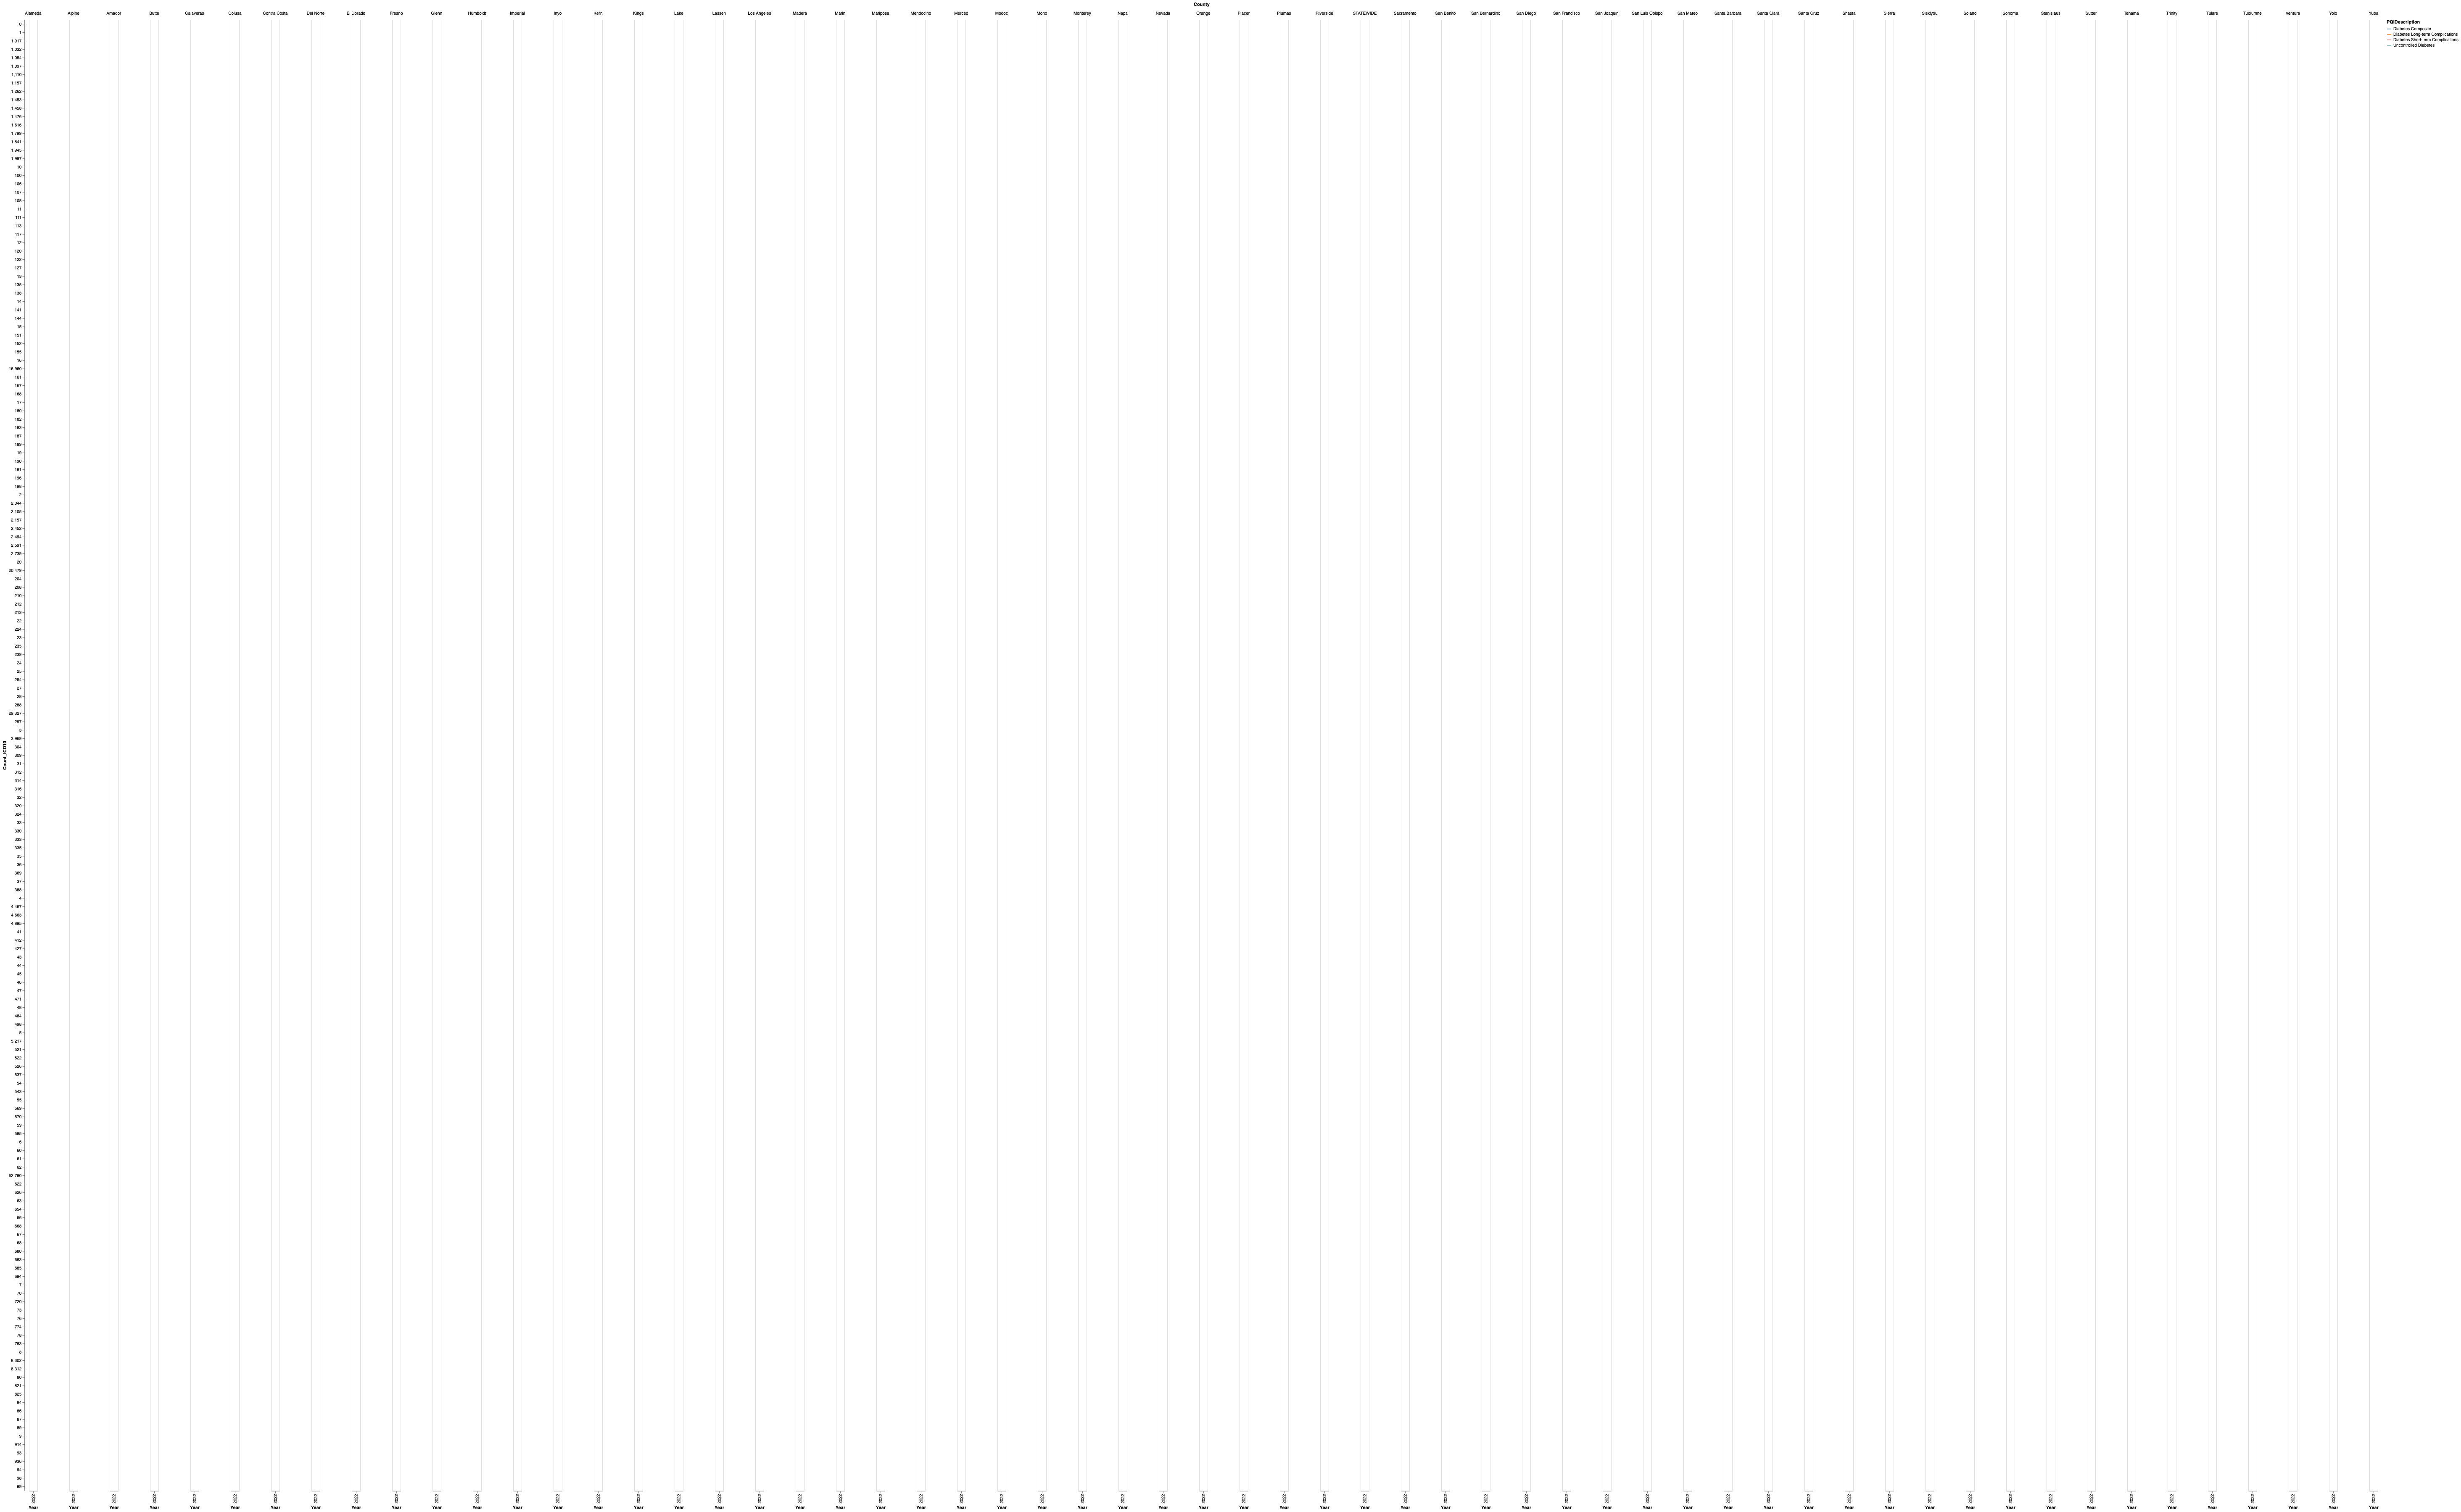

In [17]:
vis_2 = alt.Chart(counties).mark_line().encode(
    alt.X('Year:N'),
    alt.Y('Count_ICD10'),
    alt.Color('PQIDescription')
).facet(
    row = 'County'
)


vis_2





# properties(
#     title = 'Number of Death in California Due To Diabetes From 2016 To 2022',
#     width = 600,
#     height = 400
# )